Najprej skonstruiramo random slovar. Kateri nam vrne za vsako povezavo svoj uncertainty set.

In [8]:
#ta sedaj c-je poda kot seznam seznamov
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(random.randint(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

utezi = seznam_cen(5, 10, 1, 5)
#print(utezi[2])
#print(utezi)
#print(len(utezi))

#print([sum(x) for x in zip(*utezi)])
#povp_pov = [i * 1/len(utezi) for i in [sum(x) for x in zip(*utezi)]]
#povp_pov

def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

#np.transpose(x)
#numpy.subtract()

#a = np.matrix([[1, 2], [3, 4]])
#b = np.matrix([[2, 2], [2, 2]])
#
#>>> a+b
#matrix([[3, 4],
#        [5, 6]])

#np.dot(A,v)

#naračuna kovariančno matriko, ce mu podamo vsa opažanja
def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    for i in range(1, len(vse_utezi)):
        zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = 1/len(vse_utezi)*zac_mat
    return(kon_mat)

#kov_matrika(utezi)

testna_kov_mat = kov_matrika([[1,2,3],[1,2,1]])
print(testna_kov_mat)
numpy.diag(testna_kov_mat)
        
    
    

    
    
    


#mnoz([1,2,3],[1,2,3])
            
        
#numpy.dot([1,2,3],numpy.transpose([1,2,3])) #to je skalarni produkt




[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


array([0., 0., 1.])

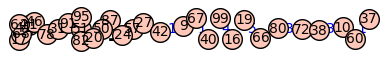

In [156]:


def graf(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena):
    utezi2 = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    graf_seznam = vsa_vozlisca(st_vozlisc, st_pov_grafa)
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_gra = []
    for j in range(0,len(utezi2)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi2[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_gra.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_gra, konec)

((graf(5, 100, 20, 1, 5))[0][0]).show(edge_labels = True)



#ggrafi = gen_grafov(cene)
#ggrafi[0].show(edge_labels = True)

#graf_seznam = graphs.RandomGNM(5, 10).edges(labels=False)
#print(g)
#gr = DiGraph(g)
#gr.show(edge_labels=False)
#
#nov = []
#for i in range(0,len(graf_seznam)):
#    nov.append(list(graf_seznam[i]))
#print(nov) 
#
#konec = []
#seznam_gra = []
#for j in range(0,len(utezi2)):
#    zadnji = []
#    for i in range(0,len(nov)):
#        vmesni = []
#        vmesni.append(nov[i][0])
#        vmesni.append(nov[i][1])
#        vmesni.append(utezi2[j][i])
#        zadnji.append(tuple(vmesni))
#    konec.append(zadnji)
#    gr = DiGraph(zadnji)
#    seznam_gra.append(gr)
#    gr.show(edge_labels=False)
#print(konec)
#print(seznam_gra)


In [18]:
#Kako seznam spremenis v set, ki bi ga nato lahko podal v DiGraph?
sezam = [1,2,3]
s = set(sezam)
msezam = set(sezam)
print(msezam)


{1, 2, 3}


In [43]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
import numpy


In [10]:
def gen_vh_pod(st_opazanj, st_pov_grafa):
    surovi_podatki = {}
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa): 
            mer_povezav.append(random.randint(1,5))
        surovi_podatki[i] = mer_povezav
    return(surovi_podatki)

#c=gen_vh_pod(3,10)
#print(c)
#M = Matrix([[0, c[0][0], c[0][1], c[0][2], 0],[0, 0, c[0][3], 0, 0],[0, c[0][4], 0, 0, c[0][5]],[c[0][6], 0, c[0][7], 0, c[0][8]],[0, c[0][9], 0, 0, 0]])
#M
cene = gen_vh_pod(10, 10)
print(cene)

def gen_grafov(c):
    g_matrike={}
    for i in range(0,len(c)):
        g_matrike[i] = [[0, c[i][0], c[i][1], c[i][2], 0],[0, 0, c[i][3], 0, 0],[0, c[i][4], 0, 0, c[i][5]],[c[i][6], 0, c[i][7], 0, c[i][8]],[0, c[i][9], 0, 0, 0]]
    print(g_matrike)
    grafi = {}
    for j in range(0, len(g_matrike)):
        grafi[j] = DiGraph(Matrix(g_matrike[j]), sparse = True, weighted = True)
    #return(g_matrike)
    return(grafi)



#ZGLEDI ZA GENERIRANJE GRAFOV
#ggrafi = gen_grafov(cene)
#ggrafi[0].show(edge_labels = True)
#ggrafi[1].show(edge_labels = True)
#ggrafi[5].show(edge_labels = True)
#ggrafi[8].show(edge_labels = True)
#ggraf[8].all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
#print(ggrafi[8].edges())
#ggrafi[5].show(edge_labels = True)

#m = gen_grafov(cene)
#DiGraph(Matrix(m[0]), sparse = True, weighted = True).show(edge_labels = True)
#DiGraph(Matrix(m[1]), sparse = True, weighted = True).show(edge_labels = True)
#DiGraph(Matrix(m[2]), sparse = True, weighted = True).show(edge_labels = True)

#c[0][0] #na tak nacin klicemo znotraj slovarjev
#type(c) vrne dictionary
cene.values()

lists_of_lists = [[1, 2, 3], [4, 5, 6]]
[sum(x) for x in zip(*lists_of_lists)]
# -> [5, 7, 9]


{0: [5, 5, 4, 4, 4, 4, 1, 2, 2, 5], 1: [4, 3, 2, 1, 5, 5, 5, 5, 5, 2], 2: [3, 4, 5, 4, 5, 2, 2, 3, 2, 1], 3: [4, 4, 4, 1, 1, 5, 2, 3, 1, 4], 4: [2, 3, 1, 1, 2, 4, 4, 4, 4, 2], 5: [3, 3, 3, 2, 1, 1, 1, 5, 4, 1], 6: [4, 5, 1, 5, 5, 4, 2, 1, 2, 4], 7: [4, 5, 3, 1, 4, 2, 4, 4, 3, 4], 8: [4, 2, 3, 5, 3, 2, 5, 5, 2, 2], 9: [2, 3, 1, 4, 2, 5, 5, 2, 3, 1]}


[5, 7, 9]

In [12]:
#JAN PROBAVA KAJ SPREMENITI

#nase_st_vozlisc = Grafek.order()
#start = random.randint(1, nase_st_vozlisc)
#end = random.randint(1, nase_st_vozlisc)
#poti = Grafek.all_paths(start, end, use_multiedges=True, report_edges=False, labels=False)
#
#st_vozlisc_grafa = graf.order()
#zacetno = 3
#koncno = 4
#vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)

#definicija za delanje vseh vektorjev ki so v seznamu:-to je to kar v resnici rabimo
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)




In [150]:
#naključna vglišča

def nakljucno_vozlisce(st_vozlisc1):
    start = random.randint(0, st_vozlisc1)
    end = random.randint(0,st_vozlisc1)
    if start == end:
        return nakljucno_vozlisce(st_vozlisc1)
    else:
        return[start, end]

#nakljucno_vozlisce(ggrafi[8])

def vsa_vozlisca(koliko, st_pov1):
    vozlisca = []
    for i in range(0, st_pov1):
        x = nakljucno_vozlisce(koliko)
        while x in vozlisca:
            x = nakljucno_vozlisce(koliko)
        vozlisca.append(x)
    return vozlisca

vsa_vozlisca(50,1000)




[[22, 46],
 [9, 40],
 [44, 13],
 [1, 24],
 [8, 26],
 [31, 37],
 [19, 46],
 [46, 14],
 [32, 3],
 [37, 12],
 [49, 29],
 [26, 1],
 [40, 35],
 [2, 45],
 [16, 44],
 [37, 19],
 [43, 44],
 [48, 12],
 [9, 3],
 [8, 13],
 [11, 39],
 [5, 27],
 [22, 1],
 [5, 11],
 [13, 3],
 [26, 45],
 [0, 11],
 [10, 27],
 [35, 9],
 [36, 3],
 [33, 46],
 [38, 1],
 [44, 37],
 [2, 12],
 [39, 48],
 [7, 21],
 [50, 3],
 [31, 46],
 [18, 33],
 [11, 19],
 [22, 14],
 [43, 21],
 [44, 19],
 [9, 24],
 [3, 0],
 [38, 19],
 [23, 9],
 [7, 47],
 [3, 24],
 [19, 2],
 [13, 25],
 [18, 26],
 [5, 37],
 [0, 44],
 [2, 44],
 [42, 3],
 [13, 17],
 [0, 16],
 [25, 0],
 [47, 46],
 [48, 8],
 [24, 35],
 [3, 49],
 [29, 21],
 [49, 9],
 [36, 6],
 [14, 4],
 [42, 30],
 [21, 17],
 [12, 30],
 [30, 41],
 [36, 23],
 [44, 15],
 [48, 23],
 [11, 13],
 [27, 34],
 [25, 44],
 [21, 15],
 [40, 38],
 [30, 45],
 [47, 27],
 [4, 25],
 [15, 4],
 [6, 33],
 [44, 14],
 [19, 41],
 [47, 34],
 [48, 46],
 [21, 22],
 [42, 23],
 [32, 30],
 [9, 42],
 [41, 49],
 [37, 29],
 [3, 42]

Skalarni produkt

In [14]:
cene = gen_vh_pod(10, 10)

def povprecje(cene1):
    seznam_cen = list(cene1.values())
    povprecne_cene = []
    for i in range(0, len(seznam_cen)):
        povprecne_cene.append(numpy.average(seznam_cen[i]))
    return(povprecne_cene)
    
print(povprecje(cene))

def vektor_skalarni_produkt(cene1, start, end, graf):
    cene_poti = {}
    for i in range(0,len(cene1)):
        x = vektorcki_x(graf[0], start, end)
        vmesni = []
        for j in range(0,len(x)):
            vmesni.append(numpy.dot(cene[i], x[j]))
        cene_poti[i] = vmesni
    return
        
vektor_skalarni_produkt(cene, 2, 4, ggrafi)


[3.4, 2.6, 3.2, 3.4, 3.4, 3.3, 3.6, 2.8, 2.9, 2.8]


NameError: name 'ggrafi' is not defined

The average objective value

In [207]:
#M3 = Matrix([[0,1,-1],[-1,0,-1/2],[1,1/2,0]])
#M4 = Matrix([[0,1.2,-3],[-1,0,-0.35],[1,0.4,0]])
#G3 = DiGraph(M3,sparse=True,weighted=True)
#G4 = DiGraph(M4, sparse= True, weighted=True)
##g = graphs.RandomGNM(15, 20)  # 15 vertices and 20 edges
##show(g)
##g.incidence_matrix()
#M3
#G3.show(edge_labels=True)
#M4
#G4.show(edge_labels=True)

{0: [2, 5, 1, 5, 5, 3, 2, 4, 3, 1], 1: [2, 5, 2, 3, 4, 3, 2, 4, 3, 1], 2: [1, 5, 2, 2, 3, 1, 3, 1, 3, 5]}


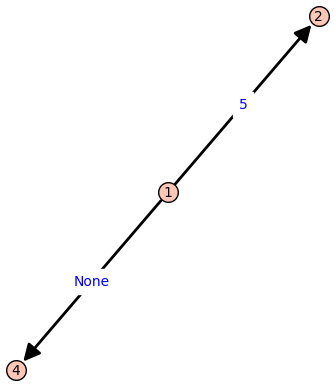

In [19]:
seznam1 = gen_vh_pod(3,10)
print(seznam1)
#G_seznam = [(1,2,seznam1[0][0]),(2,1,seznam1[0][1]),(1,4,seznam1[0][2]),(4,1,seznam1[0][3]),(1,5,seznam1[0][4]),(5,1,seznam1[0][5]),(2,3,seznam1[0][6]),
#            (3,4,seznam1[0][7]),(3,5,seznam1[0][8]),(5,3,seznam1[0][9])]
#Grafek = DiGraph(G_seznam, weighted=True)
#Grafek.show(edge_labels=True)

G_seznam = [{1,2,seznam1[0][0]},{2,1,seznam1[0][1]},{1,4,seznam1[0][2]}]
Grafek = DiGraph(G_seznam, weighted=True)
Grafek.show(edge_labels=True)


st_vozlisc = Grafek.order()
#Grafek.incidence_matrix()  #izpiše incindenčno matriko grafa
#Grafek.weighted_adjacency_matrix()
#def risanje_grafa(seznam,cene_povezav):
#    seznam
#    for i in range(0, length(cene_povezav)):
#        for i in range(0, length(list(cene_povezav)[i])):
#            seznam
            
        

{0: [5, 1, 1, 5, 1, 5, 4, 1, 1, 1], 1: [2, 5, 2, 1, 5, 4, 5, 3, 5, 1], 2: [4, 4, 3, 1, 4, 3, 5, 1, 2, 2], 3: [4, 5, 5, 5, 5, 5, 2, 1, 2, 4], 4: [3, 1, 1, 1, 2, 4, 5, 1, 2, 4]}


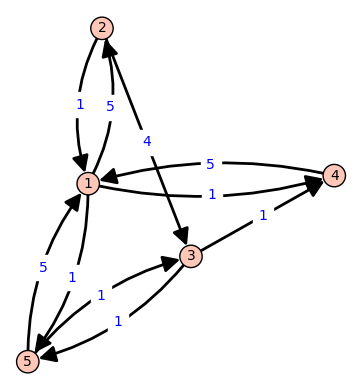

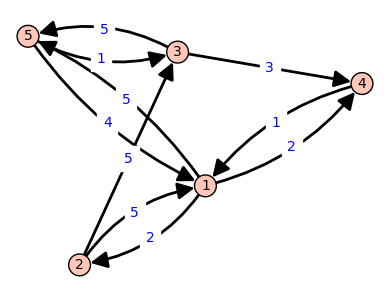

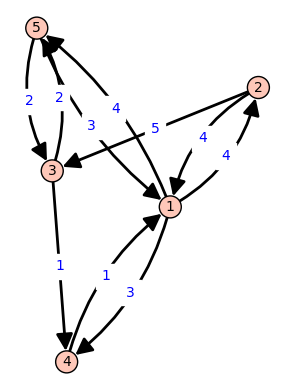

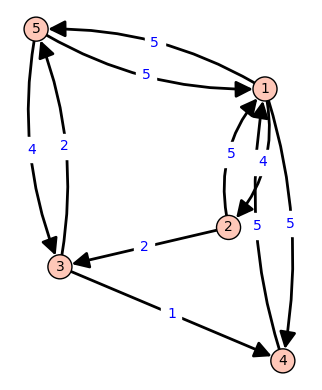

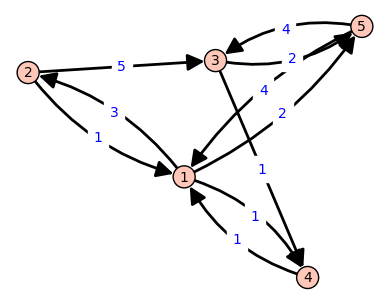

[[(1, 2, 5), (2, 1, 1), (1, 4, 1), (4, 1, 5), (1, 5, 1), (5, 1, 5), (2, 3, 4), (3, 4, 1), (3, 5, 1), (5, 3, 1)], [(1, 2, 2), (2, 1, 5), (1, 4, 2), (4, 1, 1), (1, 5, 5), (5, 1, 4), (2, 3, 5), (3, 4, 3), (3, 5, 5), (5, 3, 1)], [(1, 2, 4), (2, 1, 4), (1, 4, 3), (4, 1, 1), (1, 5, 4), (5, 1, 3), (2, 3, 5), (3, 4, 1), (3, 5, 2), (5, 3, 2)], [(1, 2, 4), (2, 1, 5), (1, 4, 5), (4, 1, 5), (1, 5, 5), (5, 1, 5), (2, 3, 2), (3, 4, 1), (3, 5, 2), (5, 3, 4)], [(1, 2, 3), (2, 1, 1), (1, 4, 1), (4, 1, 1), (1, 5, 2), (5, 1, 4), (2, 3, 5), (3, 4, 1), (3, 5, 2), (5, 3, 4)]]
5


In [13]:
#DELUJOČ
seznam1 = gen_vh_pod(5,10)
print(seznam1)

graf_seznam = []
for j in range(0, len(seznam1)):
    a = [(1,2,seznam1[j][0]),(2,1,seznam1[j][1]),(1,4,seznam1[j][2]),(4,1,seznam1[j][3]),(1,5,seznam1[j][4]),(5,1,seznam1[j][5]),(2,3,seznam1[j][6]), (3,4,seznam1[j][7]),(3,5,seznam1[j][8]),(5,3,seznam1[j][9])]
    graf_seznam.append(a)
    Grafek = DiGraph(a, weighted=True)
    Grafek.show(edge_labels=True)
    st_vozlisc = Grafek.order()
print(graf_seznam)
print(st_vozlisc)
        

#G_seznam = [(1,2,seznam1[0][0]),(2,1,seznam1[0][1]),(1,4,seznam1[0][2]),(4,1,seznam1[0][3]),(1,5,seznam1[0][4]),(5,1,seznam1[0][5]),(2,3,seznam1[0][6]),
#            (3,4,seznam1[0][7]),(3,5,seznam1[0][8]),(5,3,seznam1[0][9])]
#Grafek = DiGraph(G_seznam, weighted=True)
#Grafek.show(edge_labels=True)



In [82]:
#def generiranje_uncertainty_sets(st_poti):
#    nakljucna_cela = {}
#    for j in range(1, st_poti+1):
#        nakljucna = []
#        for i in range(0,4): #koliko števil je v množici
#            n = random.randint(1,30)
#            nakljucna.append(n)
#        nakljucna_cela[j] = nakljucna
#    return(nakljucna_cela)
#
#generiranje_uncertainty_sets(10)
#

{1: [8, 24, 4, 30],
 2: [26, 27, 7, 13],
 3: [18, 19, 1, 21],
 4: [3, 27, 6, 5],
 5: [9, 25, 30, 8],
 6: [28, 24, 29, 30],
 7: [8, 1, 16, 27],
 8: [9, 20, 11, 2],
 9: [5, 22, 19, 20],
 10: [4, 30, 5, 8]}

Narišimo najprej za majhne grafe. Graf z 7 vozlišči.




In [208]:
#seznam = [(1,3,3),(1,5,3),(5,1,4),(4,2,4),(5,2,5),(3,4,6),(3,5,7),(5,4,8),(2,6,9),(4,6,13),(6,7,13)]
#d=DiGraph([[1..7],seznam], weighted=True)
#d.show(edge_labels=True)
#
#short = shortest_paths(d, start = 1, weight_function = None, algorithm=None)
#print(short)
#d.all_paths(start=1, end=7, use_multiedges=True, report_edges=False, labels=False)



Naredimo funkcijo, ki nam išče najkrajšo pot v grafu.  (Tega za zdaj ne rabimo.)

In [14]:
def BFS_SP(graph, start, goal): 
    explored = [] 
    queue = [[start]] 
    if start == goal: 
        print("Same Node") 
        return
    while queue: 
        path = queue.pop(0) 
        node = path[-1] 
        if node not in explored: 
            neighbours = graph[node] 
            for neighbour in neighbours: 
                new_path = list(path) 
                new_path.append(neighbour) 
                queue.append(new_path) 
                if neighbour == goal: 
                    print("Shortest path = ", *new_path) 
                    return(new_path)
            explored.append(node) 
    print("So sorry, but a connecting path doesn't exist.")
    return(new_path)

new = BFS_SP(d,1,7)
print(new)

NameError: name 'd' is not defined

In [0]:
#nase_st_vozlisc = Grafek.order()
#
#def kon_zac(graf):
#    par_voz =[]
#    st_voz = graf.order()
#    start = random.randint(0,st_voz)
#    end = random.randint(0,st_voz)
#    if end == start:
#        kon_zac(graf)
#    else:
#        start_end(stevilo) 
#
#print(start_end(nase_st_vozlisc))

Sestavimo vektor x

In [15]:
#to je za prvi oklepaj v vseh poteh
#pot = (vse_poti[0])
#print(pot)
#prvi_oklepaj = list(zip(pot, pot[1:] + pot[:1])) 
#print(prvi_oklepaj[:-1])

#to nam vzame samo prve dve številke v seznamu od grafa
#par = []
#for i in range(0,len(G_seznam)):
#    par.append(G_seznam[i][0:2])
#print(par)
#
#vektor x za prvo pot
#x=[]
#for i in range(0, len(par)):
#    if par[i] in prvi_oklepaj:
#        x.append(1)
#    else:
#        x.append(0)
#print(x)


#nase_st_vozlisc = Grafek.order()
#start = random.randint(1, nase_st_vozlisc)
#end = random.randint(1, nase_st_vozlisc)
start = 3
end = 4
poti = Grafek.all_paths(start, end, use_multiedges=True, report_edges=False, labels=False)

#definicija za delanje vseh vektorjev ki so v seznamu:-to je to kar v resnici rabimo
def vektorji_x(vse_poti):
    par = []
    for i in range(0,len(G_seznam)):
        par.append(G_seznam[i][0:2])
    print(par)
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

vektorji_x(poti)

[(1, 2), (2, 1), (1, 4), (4, 1), (1, 5), (5, 1), (2, 3), (3, 4), (3, 5), (5, 3)]


[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0]]

tega naprej načeloma ne rabiva (da je gor cela množica):

In [209]:
#a = generiranje_uncertainty_sets(10).values()
#print(a)
#print(list(a)[0])
#

#u=DiGraph([[1..7],[(1,3,list(a)[0]),(1,5,list(a)[1]),(4,2,list(a)[2]),(5,2,list(a)[3]),(3,4,list(a)[4]),(3,5,list(a)[5]),(5,4,list(a)[6]),(2,6,list(a)[7]),(4,6,list(a)[8]),(6,7,list(a)[9])]])
#u.show(edge_labels=True)

Skalarni produkt

In [7]:
a = [0,1,2]
b=[3,4,5]
print(numpy.dot(a,b))





14
